<a href="https://colab.research.google.com/github/pelinsuciftcioglu/SpotifyProject/blob/main/Group_86_Spotify_Project_Summarize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#1DB954"> **Spotify Song & Genre Analysis:</font> Popularity Prediction and Building a Simple Recommendation System**
---
<dl>
<dt>Ahmet Alper Özkan - 26413</dt>
<dt>Pelinsu Çiftçioğlu - 25204</dt>
<dt>Defne Çirci - 24939 </dt>
</dl>

---


## <font color="#1DB954">**1. About the Dataset**</font>

The main dataset, Spotify Dataset 1921-2020, 160k+ Tracks, retrieved from [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks). There are 5 different files in the dataset which provides the following information:

1. **"data.csv":** Each row represents a single track and columns as features.
2. **"data_w_genres.csv":** Each row represents a single artist and columns as audio features.
3. **"data_by_year.csv":** Each row represents a single year and columns as audio features.
4. **"data_by_genres.csv":** Each row represents a single artist and columns as audio features.
5. **"data_by_artist.csv":** Each row represents a single artist and columns as audio features.

## <font color="#1DB954">**2. Exploratory Data Analysis**
</font>

To understand the dataset better; visualizations, descriptive statistics and analysis are fundamental. Data files in the dataset are explored in the following section. This also provides insight from different perspectives to the dataset.

The 5 different files, essentially correspond to the same information but the ordering is different to provide an analysis for different purposes. In the first stages, the exploration of the songs and the genres has been conducted. Hence, only "data.csv" and "data_w_genres" files are utilized.

For a better idea about these data sets, first few rows of the **"data.csv"** and **"data_w_genres.csv"** can be seen as the the following, respectively:

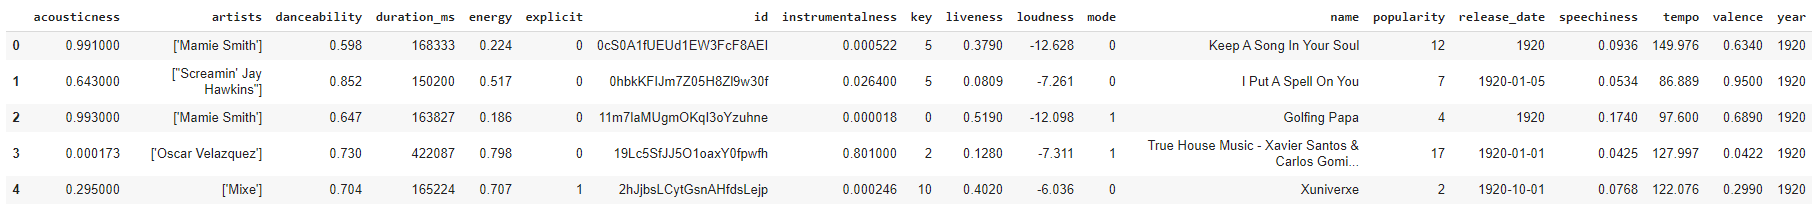

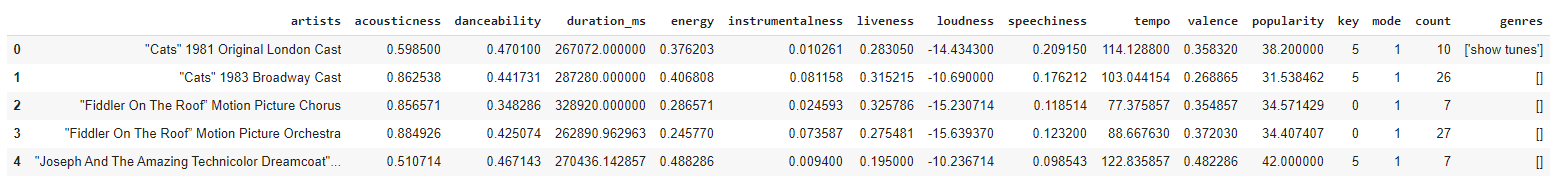

### <font color="#9400D3">**2.1. Tracks and Audio Features**</font>


First data file, **"data.csv"** as it can be seen above, consists of explatory information about tracks. And the audio features attributed to tracks are the following:

> 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year'

And the data types of the columns can be seen from below. As expected, numeric values are either float or integer type, string values are object type and since id provides a categorical information its object type.

|Data Column       |Type         | 
|:-------------|-------------:| 
|acousticness   |    float64
|artists         |     object
|danceability     |   float64
|duration_ms       |    int64
|energy            |  float64
|explicit           |   int64
|id                  | object
|instrumentalness   | float64
|key                 |  int64
|liveness           | float64
|loudness           | float64
|mode               |   int64
|name               |  object
|popularity         |   int64
|release_date       |  object
|speechiness       |  float64
|tempo             |  float64
|valence           |  float64
|year              |    int64


The variables of the dataset are viewed which gives information about the metrics of **"data.csv"**:

>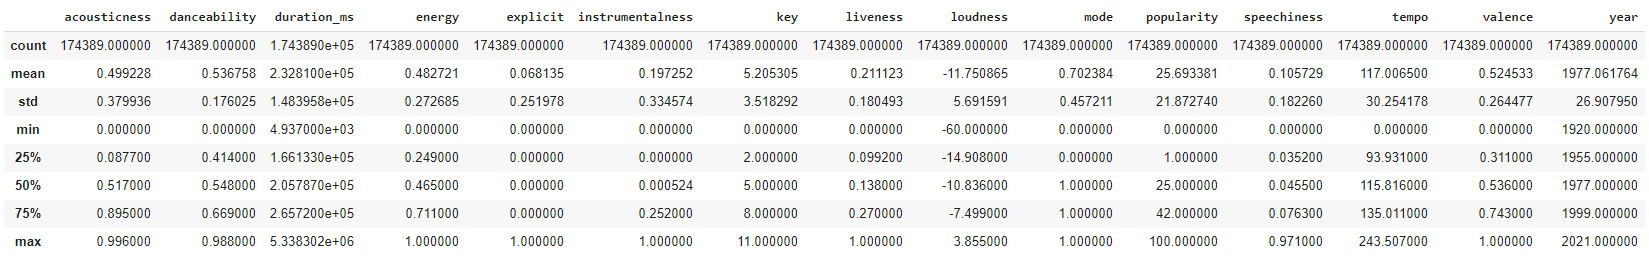

Additionally, it has been checked whether there are any missing values in the data set which might cause some problems later on and it has been observed that there is no missing data in any of the columns.



---

To achieve more relevant observations, some manipulations are made.

It has been observed there are white noise / meditation tracks, which do not provide valuable information and are dropped from the dataframe (~0 energy, danceability, instrumentalness and acousticness).

Addtionally, since the duration of the tracks are given in milliseconds, it is converted to seconds for better comprehension.

Some variables are qualifiers (id, artists, name), binary (explicit) or general descriptives (key, mode, release_date, year). Including only numeric variables related to musicality may allow us to differentiate how popularity can be described in general terms. Release year is also included to see how music styles may have changed over the years.

After that, correlation matrices from datasets with the extracted features have been created. It can seen below as two different categories: **Non-Zero Popularity Tracks** and **Zero Popularity Tracks**.

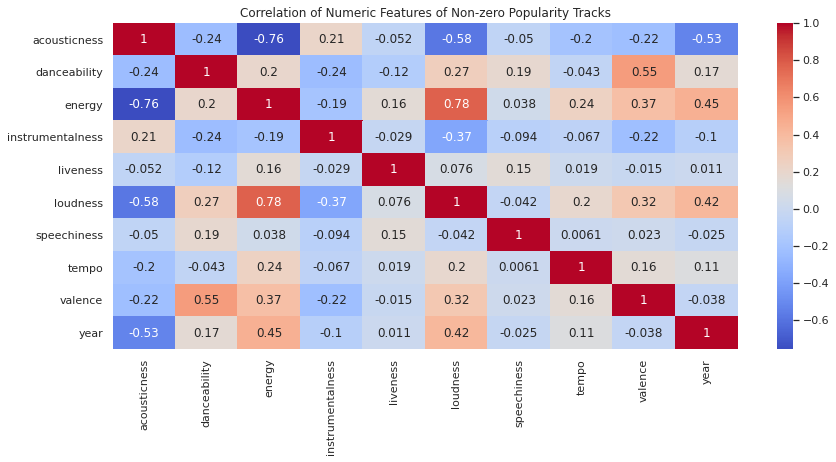

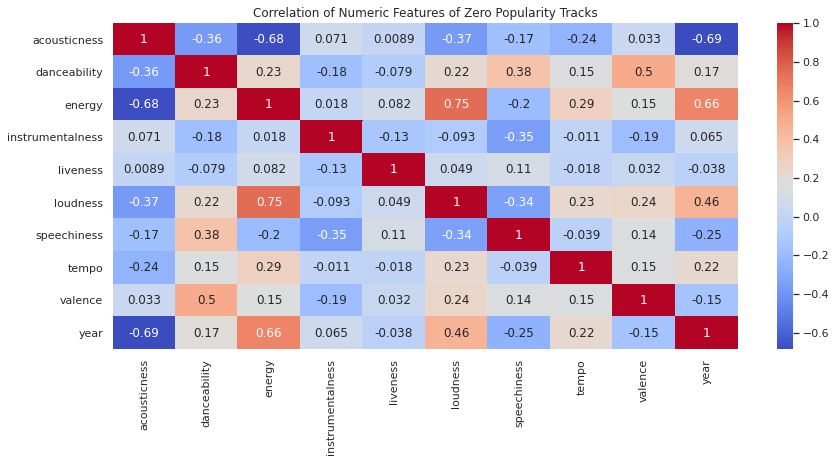

Using the correlation matrices, it is possible to deduce that many features are similarly correlated for zero and non-zero popularity tracks (acousticness, danceability, loudness and tempo rows). Since the number of tracks between the zero (41k) and non-zero popularity (133k) matrices differ, a total correlation (i.e. zero popularity tracks display total relevance to non-zero popularity tracks) cannot be implied.

---

Distributions of numeric variables can be found below:

> Zero Popularity Tracks' Distributions of Numeric Features

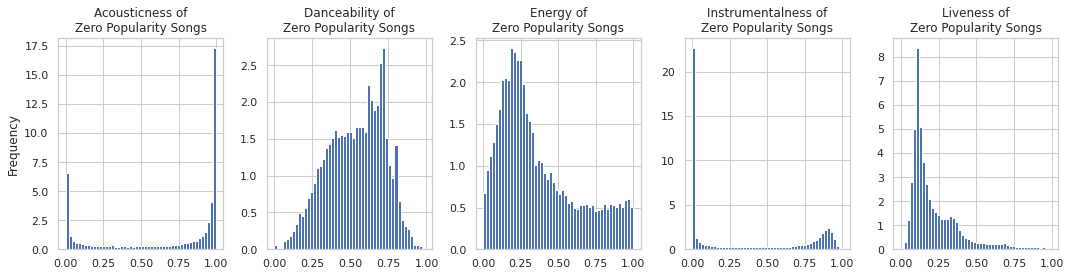
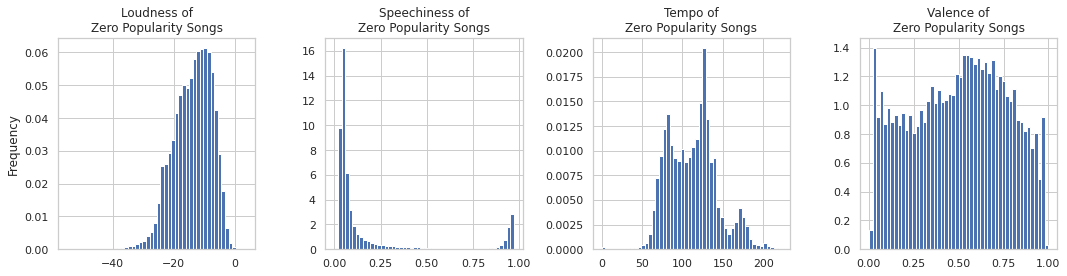

> Non-Zero Popularity Tracks' Distributions of Numeric Features

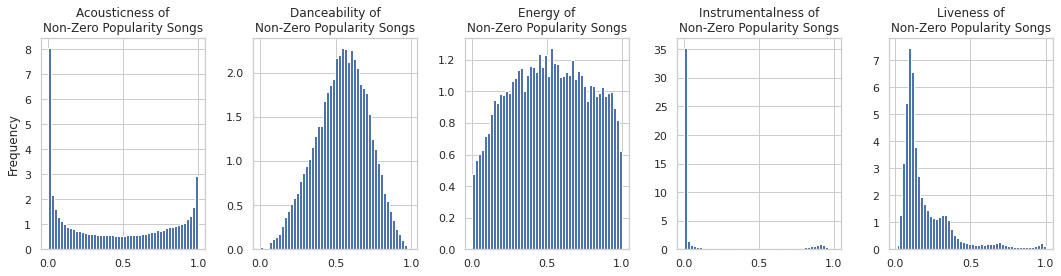
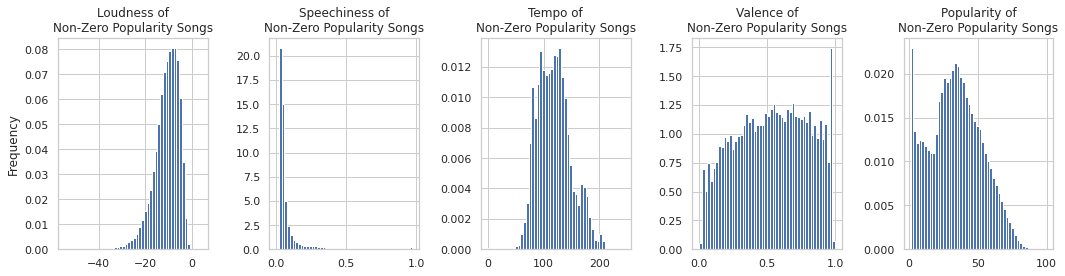

The distributions of variables are visually similar, pointing to the fact that the popularity variable may be based on specific factors, mainly the time frame i.e. time of release. Using the non-zero popularity data, it can be observed that the maximum popularity increases as the time of release approaches the latest recorded date. 

This causes an apparent question in mind that is popularity directly correlated with musicality, or does it have something to do with Spotify's methods of calculation and recommendation? To observe the popularity over the years, another heat map is generated as follows:

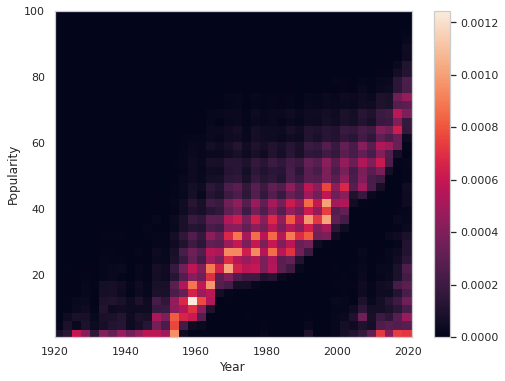

Looking at the zero popularity tracks alone, their numbers are populated largely before 1950 and after ~2000. It can be inferred that since the ease of music publication after 2000 increased the number of releases, and pre-rock era songs are not as sought after, zero popularity songs constitute a large number of all releases (nearly 1/3 of the dataset).

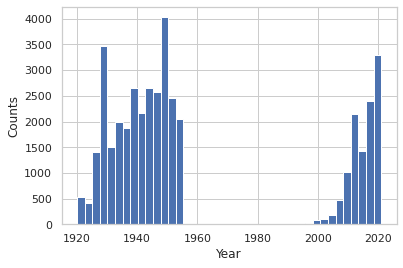

How does confining the timeframe to post-2000 affect the correlation of variables? It can be understood that post-2000 tracks are more varied and don't follow a general trend in general (year is generally uncorrelated with other variables). Acousticness does not vary as much vs. year (-0.53 in general, -0.023 post-2000), and the mean comes out to be nearly half of the non-zero popularity's.

- Post-2000 acousticness mean: 0.25614573978054594.
- Post-2000 acousticness mean: 0.44576901266908864.

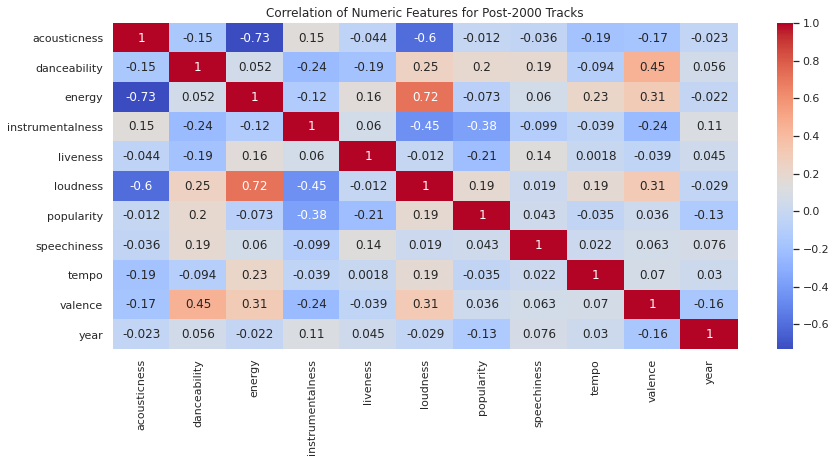

There are 36195 unique artists and 137013 unique song names. Top songs' year and tempo distributions are also checked. It is observed that most of the top songs are published very recently.

Top songs are extracted from the data using sort method with popularity and numerical features are visaulized as a scatter plot as follows:

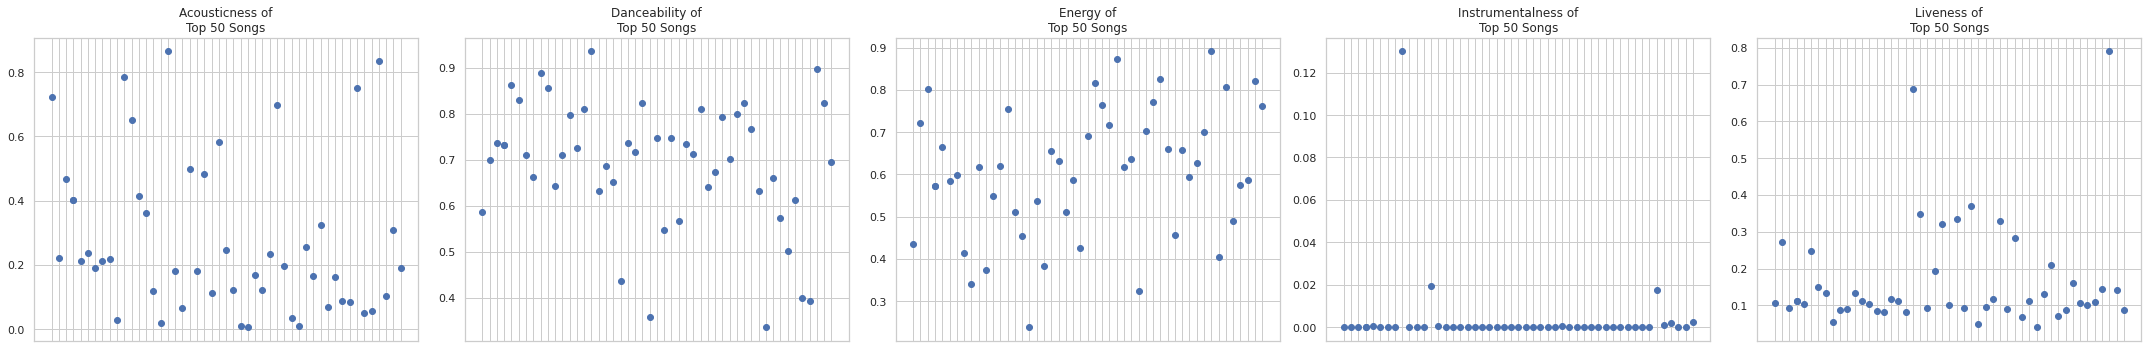
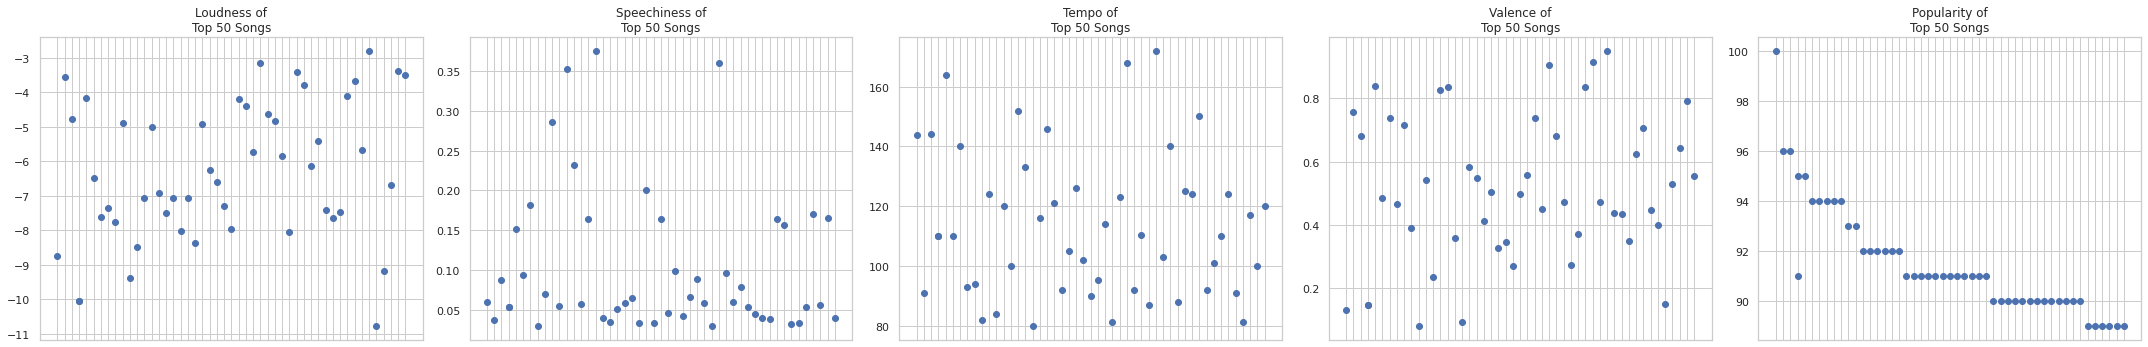

It can be observed that the hit songs (based on popularity) operate on some common bases - high energy and tempo, minimally instrumental / maximally vocal studio releases (low liveness parameter).

And those 50 most popular songs are listed below with their respective popularity scores. 

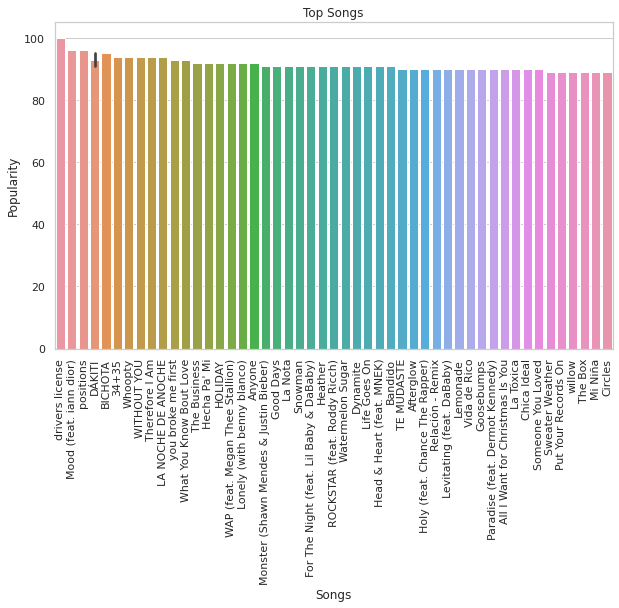

### <font color="#9400D3">**2.2. Genre Reduction and Classification**
</font>




It has been observed that there is a significant number of genres, many of which are subgenres. Below indicates the first 10 rows of the new data used in the following section which is **"data_by_genres.csv"**.



As it can be seen from above this data set includes some missing values in genres columns which can be seen with the indicator [].

From [Spotify's official Web API reference](https://developer.spotify.com/documentation/web-api/reference/#objects-index), the popularity metric is defined as follows:

>"The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, **on the total number of plays the track has had and how recent those plays are**.
Generally speaking, **songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past** [...]"

This mirrors the results above, as the popularity per track tends towards 100 as time progresses and older songs are less popular overall.

As seen below, the most popular songs are in subgenres, describing the track itself. For instance, the most popular song genres are 'Chinese Electropop', 'Korean Mask Singer' and 'Yaoi'. When the the number of occurrences of these genres in the data frame is investigated, they are unique. 

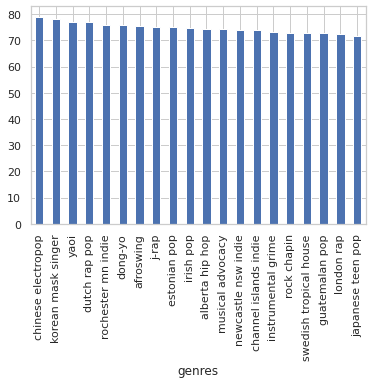

To solve the issues mentioned above, and for the purpose of simplicity, the genres are classified to main 15 + 1 (other) categories. Since the 'Other' category consists of songs from many different genres which are not from any classified category, it does not provide an accurate information to comment on.

Here is the new categories of classified genres:

- **Country**
- **Acoustic**
- **Electronic**
- **Techno**
- **Classical**
- **Hip-Hop**
- **Indie**
- **Jazz**
- **K-Pop**
- **Metal**
- **Oldies**
- **Pop**
- **Rap**
- **R&B**
- **Rock**
- **Other** (For the genres that are not classified)
- **0** (For the genres that are missing)

However, the most popular genres according to the main categories can be observed below. The new classification is also added to the data frame which can be seen from below in the first 20 columns.


Additionally, for the new extracted categories, the centerality metrics are observed. As seen below in terms of mean and median metrics, popularity of the classified genres differ slightly. However, in both cases the most popular genre is Rap in terms of mean and median.
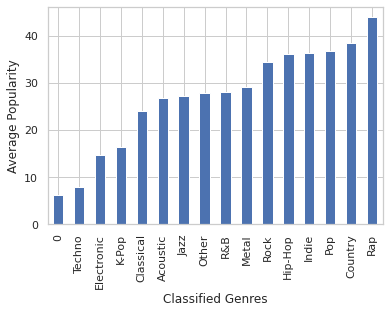
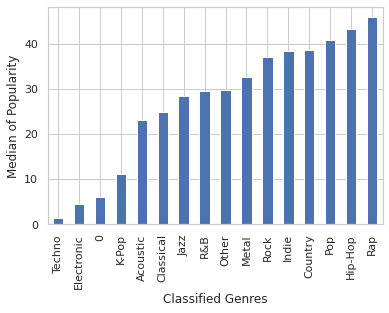

Since there are a lot of genre with 0 poularity which does not provide any useful information for comparison or contrast and any benefit for the continium of the project, the mean distribution also observed by looking at the genres with extracting 0 popularity songs.

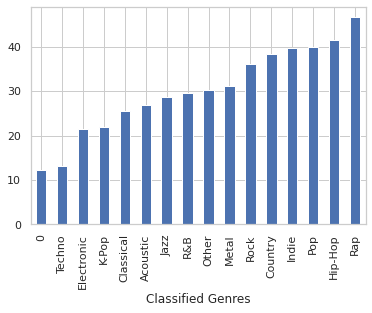

Addtionaly how the popularity of genres differ are observed below according to the standard deviation metric. It can be interpreted as the genres have a significant variance in terms of popularity between genres.

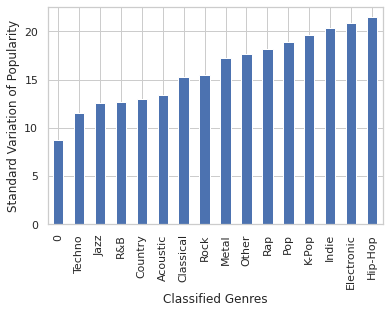

## <font color="#1DB954">**3. Temporal Analysis of the Genres**
</font>

Genres are added to the previous data set **"data.csv"** to have both genres and the song names all together. In other words, now the songs in each row is also classified with their respective genres. And the new version merged data frame can be seen as the following:

>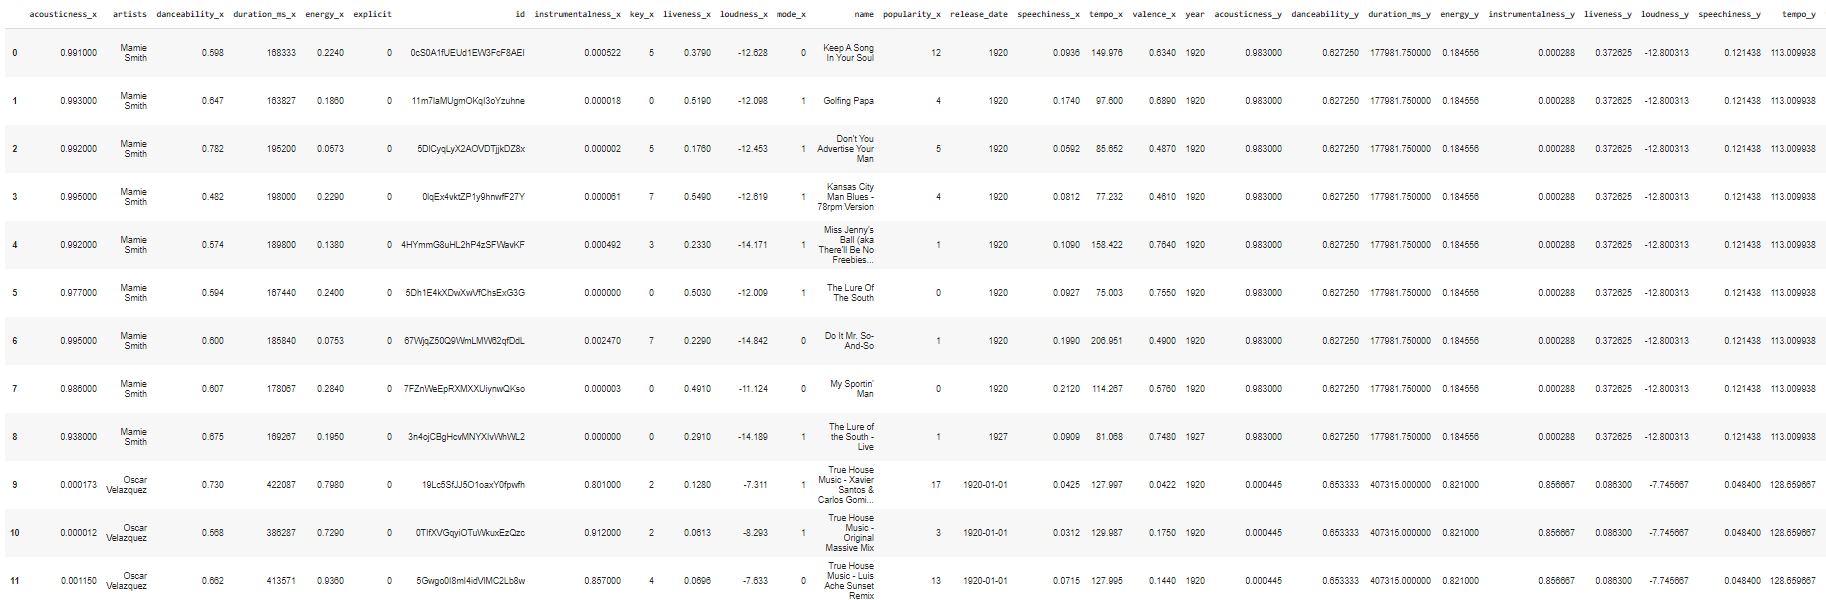

>(cont'd)

>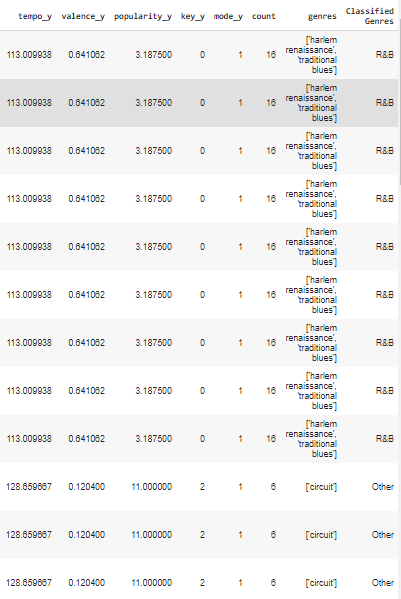


For the sake of exploration, one main genre is selected for further analysis which is **Rock**. And following is the temporal analysis for it.

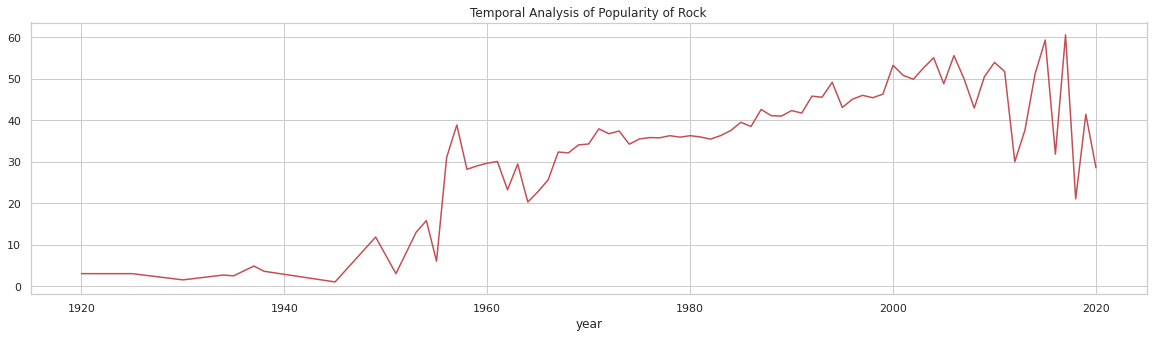

As it can be seen from the above for rock, in general, the trend tends to increase. It can be said that the popularity increases with the release year. However, in the following sections, appropriate statistical tests will be conducted to check whether this observation is significant enough i.e. worth mentioning.

## <font color="#1DB954">**4. Statistical Analysis & Hypothesis Testing**
</font>

### <font color="#9400D3">**4.1. Statistical Analysis of Tracks Based on Popularity**</font>



#### **4.1.1. Features' Contribution to Popularity of Songs**

From the visualizations of acoustic variables' frequencies between zero and non-zero popularity tracks, it can be observed that the distributions of danceability, energy, loudness, tempo, liveness and valence can be modelled as Gaussian curves using the central limit theorem.

By comparing the mentioned features above, contribution of acoustic variables on popularity can be inferred, even though the popularity metric seems that it is heavily based on the release date and how many times the track has been played repeateadly.

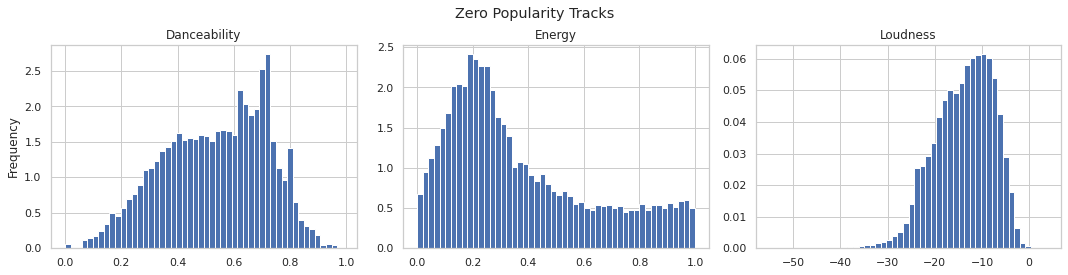

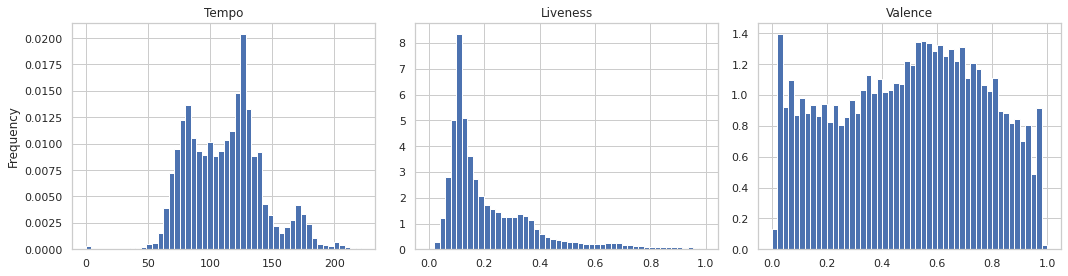

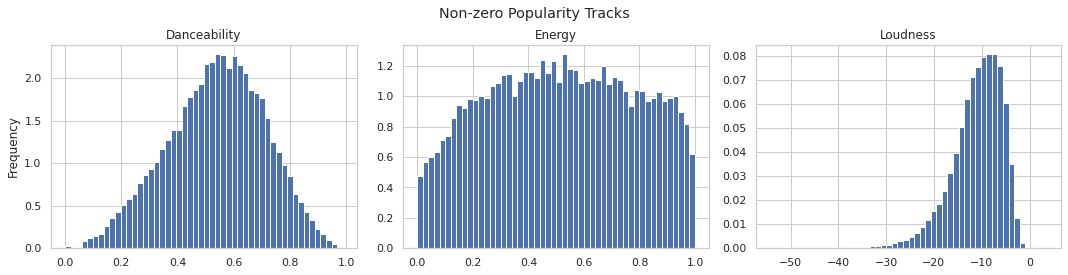

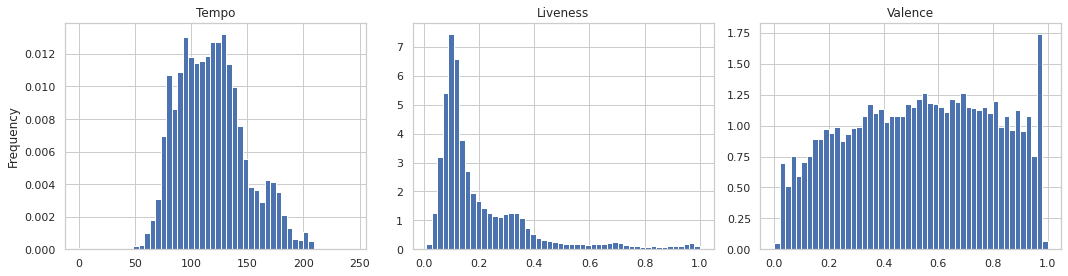

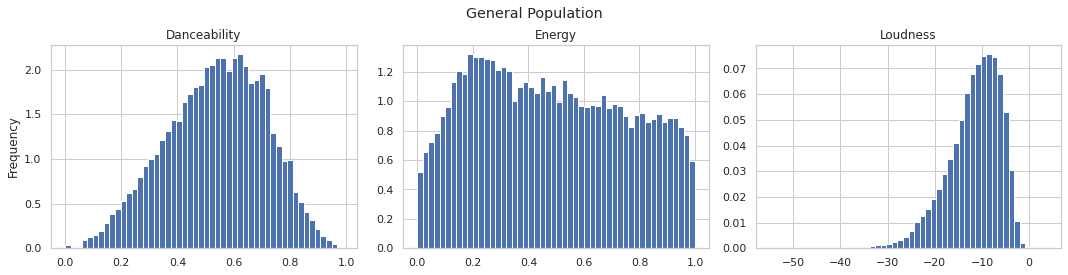

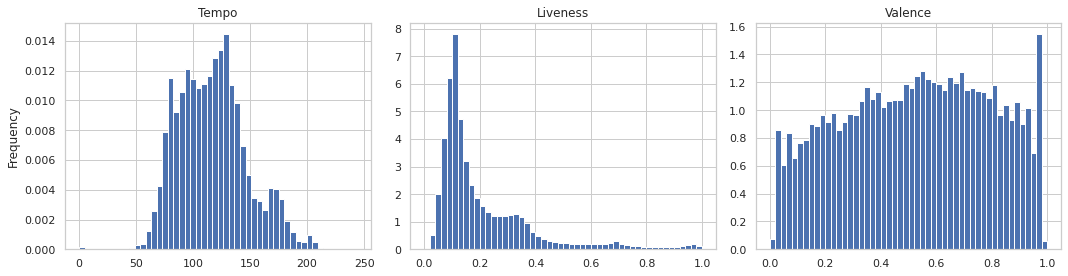

Overlaying zero and non-zero popularity distributions of above variables using `sns.kdeplot` with using smoothing parameter as 3 following graphs can be observed:

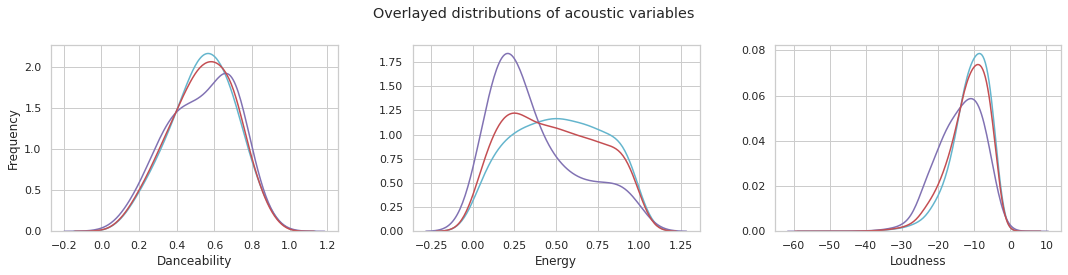

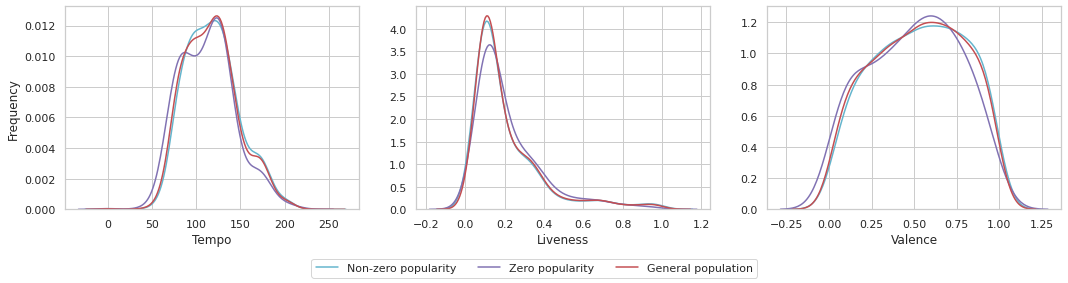

Even with the smoothing applied, the distributions are far from being normally distributed. Central limit theorem is applied next by using sample means with sample size $n=5000$ with $1000$ random samples drawn from the sample.

The sample mean distributions are found above and plotted below as KDE plots:

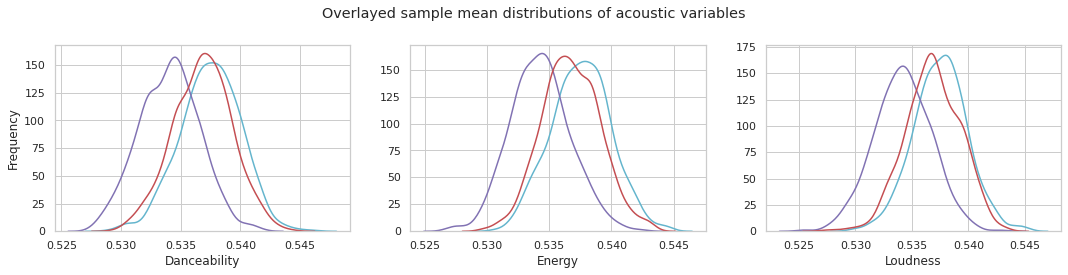
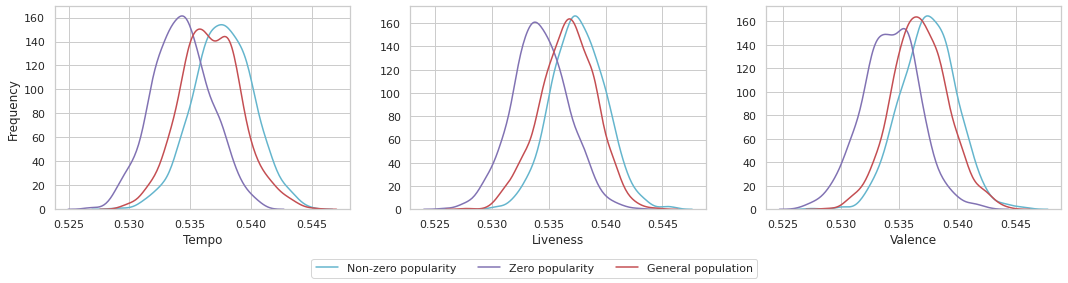

Overall, sample mean distributions better resemble normal distributions.

---

Means and standard variations are calculated for the hypothesis tests. And the statistics for the three groups are tabulated as the following:

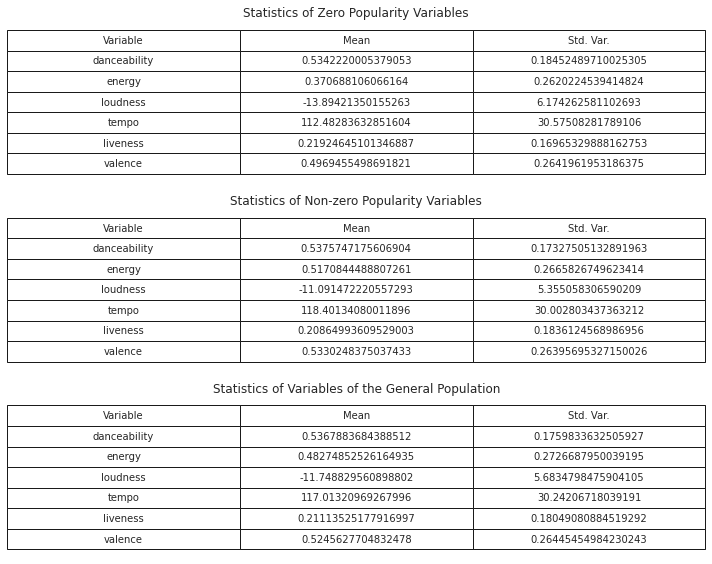

The null and alternative hypotheses for each of the variables are:

$H_0: \mu_{pop.>0}=\mu_{pop.=0}$

$H_A: \mu_{pop.>0}\ne\mu_{pop.=0}$

where $pop.$ corresponds to popularity. The p-values to validate the hypotheses are found using the SciPy t-test.

The final p-values can be found below with the appropriate confidence intervals calculated by  for each variable ($t^{*}=1.96$ for $df=n-1=4999$) for each variable:

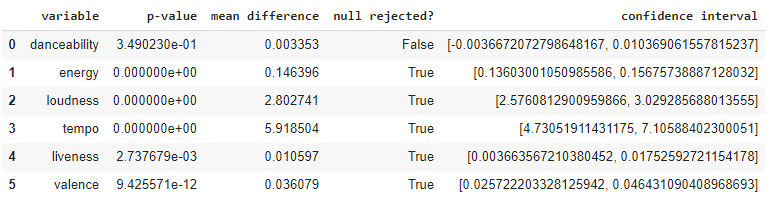

From the above confidence interval, danceability is the only variable for which the null hypothesis (mean difference $\mu_{diff}$ is equal to 0) is true and $\mu_{diff}=0$ is in the confidence interval. For the rest of the variables, the alternative hypotheses are true and each $\mu_{diff}$ is in their respective confidence intervals.

From the *t*-tests and subsequent confidence intervals, it can be concluded that the five variables except for danceability contribute to the popularity of tracks. The significance of each variable to the popularity metric is so far unknown, and the effect of release date is not included, therefore a soft conclusion is more appropriate. 

---

In order to calculate the significance of each variable to the popularity metric, p-values of each accoustic variables are calculated using ordinary least squares regression method. In this method, the aim is to achieve higher R squared values. The ones that have higher p values than the selected significance level are eliminated since they they do not affect the popularity much. It is important to keep in mind that correlated features might have an effect on their p values, therefore these should be treated carefully. Correlation matrix can be found in the data analysis part.

$H_0:$ Column/Feature does not affect song popularity.

$H_A:$ Column/Feature affects song popularity.

If a feature shows *p*-value larger than 0.05, we do not reject the null hypothesis and conclude that column/feature does not affect the popularity.

---

Feature Elimination Using *p*-values
5% significance level is selected. This means the *p*-value will be 0.05. 
It has been identified the feature or predictor which has the highest *p*-value. 
If the *p*-value of this feature is greater than the significance level selected in the first step, this feature is removed from the data set ([ML Mind](https://machinelearningmind.com/2019/10/14/feature-elimination-using-p-values/)).

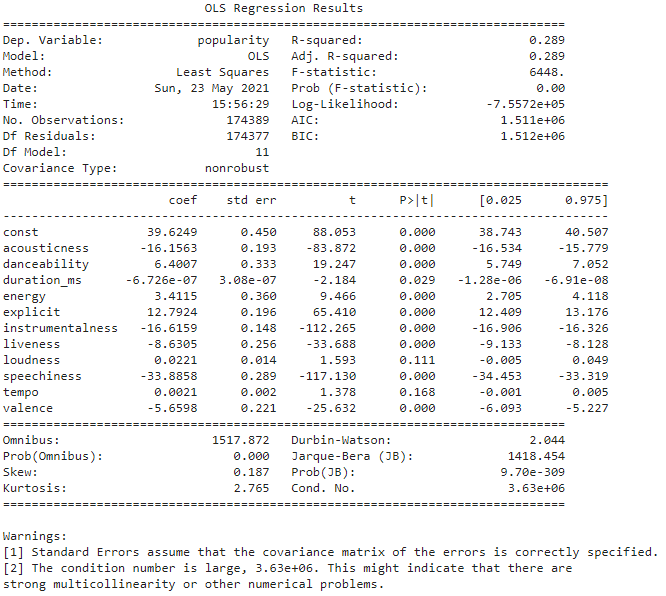

Regression resulted in `R-squared` equal to 0.289. `*p* > |*t*|` values show the significance of each variable. Only the *p*-values of loudness and tempo are more than 0.05, thus they do not have significant effects on popularity. Loudness and tempo are eliminated and `R-squared` is calculated again.

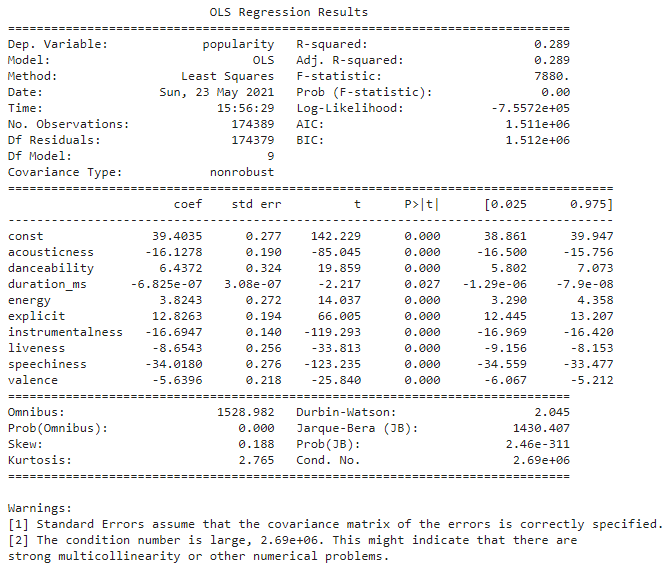



As expected, `R-squared` (0.289) did not change significantly. All the features left have *p*-values less than 0.05, meaning that they have a significant effects on popularity. There are no features left to eliminate. This is tested by removing one and checking the change in `R-squared`. 

Acousticness is removed for this trial:

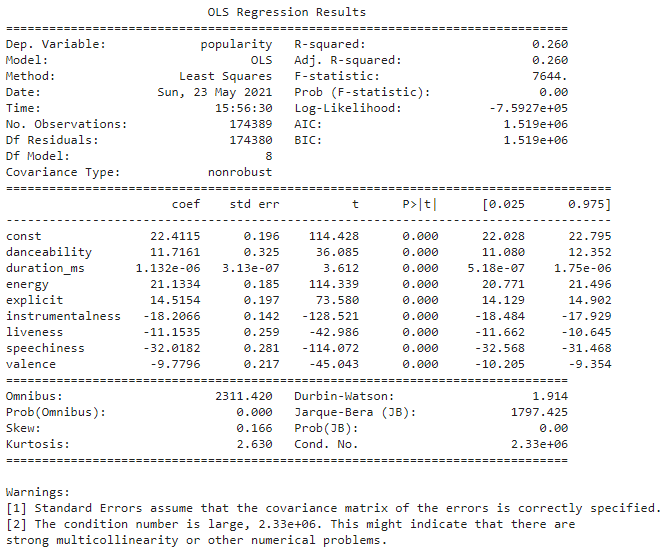

Indeed, `R squared` value decreased drastically from 0.289 to 0.260.

### <font color="#9400D3">**4.2. Statistical Tests for Differences Between Different Eras**</font>


#### **4.2.1. Difference Between Before 70's and After** 

As the difference between the mean scores of the songs that are released before 1970 and after 1970 are high, it's significance is checked . From the figure on the right, it can be observed that the songs that are relased after 1970 obtained better results on average compared to the ones released before 1970. Since *p*-value is very close to 0, null hypothesis which argue that both have equal means is rejected. 

To remove this bias, further analysis is done with the songs that are released after 1970 by dividing them into 4 groups: **60's, 70's, 80', 90's and 2000's**. And the genres will be categorized accordingly to analyze each genre separeatly from each other.

- Mean score of songs which is released before 1970: 19.63
- Mean score of songs which is released after 1970 1: 40.22

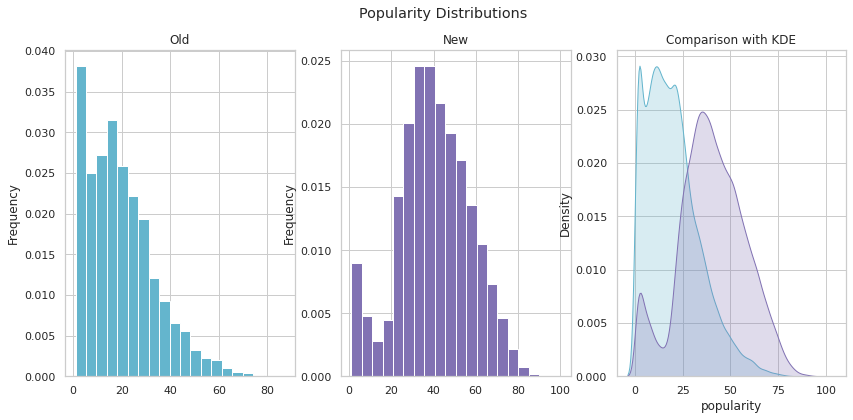


From the figure above, it can be seen that the songs that are relased after 1970 obtained better results on average compared to the ones released before 1970.

The result of this difference is statistically shown below after applying a significance test:

- *t*-test: Statistic = -234.315262223173, *p*-value < .001)


Since the obtained *p*-value is less than or equal to the significance value, the null hypothesis is rejected, otherwise it would signify failing to reject the null hypothesis.

#### **4.2.2. Difference Within Most Popular Genres According to Era**


Since it has been observed that from the means, the most popular genres (after removed the 0 popularity songs) were **Rap**, **Hip-Hop** and **Pop** in Section 2.2,  analysis will be based on those genres.

For this purpose, it has been created another function to classify all th songs to their era's based on the year they have been released. And the new version of the data set can be seen from below with the first few columns:

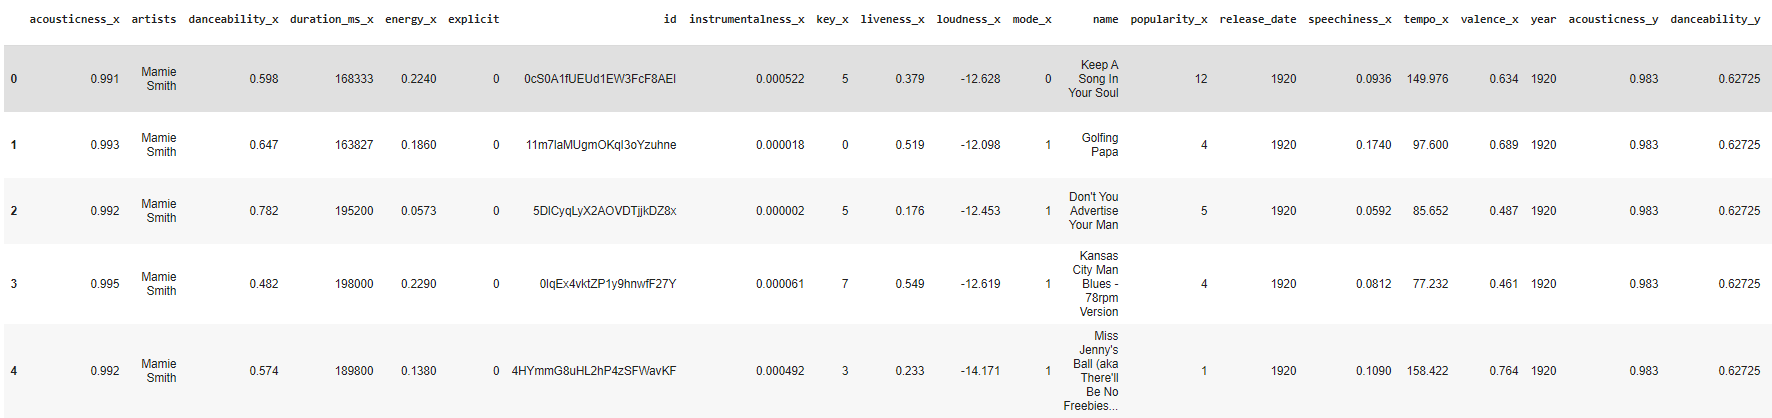
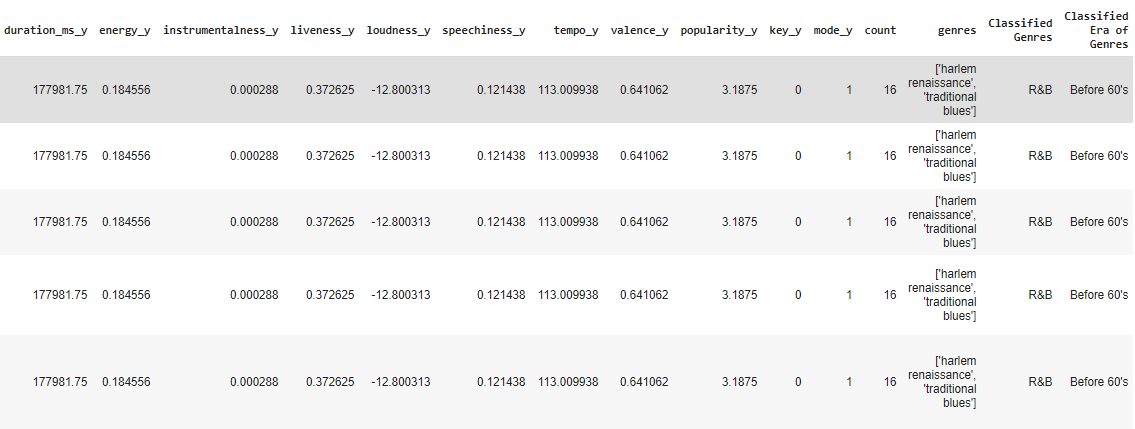

##### **RAP**
In here, it has been investigated that whether Rap genre was affected by the era it belongs, i.e. whether there was a significant difference betweeen different years for popularity.

- $\large H_0:$ There is no significant effect of era on popularity on Rap songs.
- $\large H_A:$ Rap songs' popularity is affected by the era.

The 0 popularity songs has been dropped and the data set is divided for 70's, 80's, 90's and 2000's where all category represented an era of Rap Songs.

- Mean score of popularity of Rap Songs of 70's: 31.17.
- Mean score of popularity of Rap Songs of 80's: 42.08.
- Mean score of popularity of Rap Songs of 90's: 41.29.
- Mean score of popularity of Rap Songs of 2000's: 50.09.

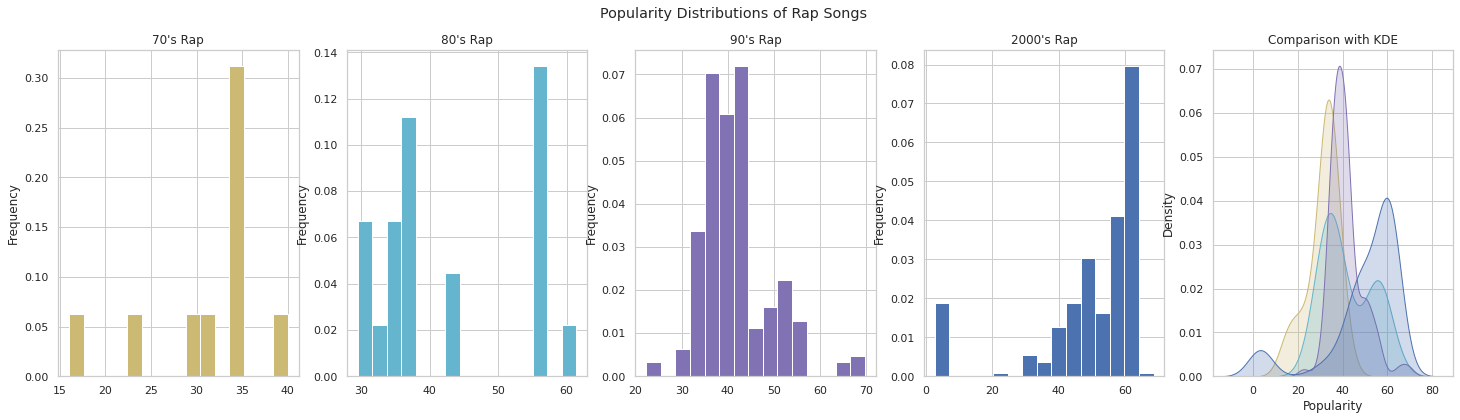

As it can be seen above and especially from KDE plot, 70's Rap was closest to normal distribution then 90's. But 80's nearly shows a denstiy distribution close to bimodal distribution and 2000's rap is highly negatively skewed. However, since the sample size is big enough (N > 20), the distrbutions will be used for further analysis.

Here, one-way between samples ANOVA will be conducted to conclude whether there is a significant difference between different eras of Rap. To do so, first Levene's test will be conducted for the assumption check.

- Levene Result: Statistic = 9.975250480298461, *p*-value = 2.175357098019502e-06)


As it can be seen from above, the Levene's test for homogenity of variances is violated, *p* < .001, which was expected when looked at the graph of their distribtions. Thus, the approach should be more suspicious when dicussing the result of ANOVA, for the simplicity, there has been no correction applied for the test.

- F One-way Result: Statistic = 22.16870744600251, *p*-value = 1.8506499141071616e-13)


As it can be seen above, even though one should be careful with interpreting the results because ıf the failure in the assumpiton check, the result seems to be highly significant, *p* < .001. That means, we can reject the null hypothesis and conclude that there is a difference betweeen different eras of on popularity, spesifically for 70's, 80's, 90's, and 2000's for RAP.

#####**HIP-HOP**



In here, it has been investigated that whether Hip-Hop genre was affected by the era it belongs, i.e. whether there was a significant difference betweeen different years for popularity.

- $\large H_0:$ There is no significant effect of era on popularity on Hip-Hop songs.
- $\large H_A:$ Hip-Hop songs' popularity is affected by the era.

The 0 popularity songs has been dropped and the data set is divided for 70's, 80's, 90's and 2000's where all category represented an era of Hipo-Hop Songs.

- Mean score of popularity of Hip-Hop Songs of 70's: 34.97.
- Mean score of popularity of Hip-Hop Songs of 80's: 35.97.
- Mean score of popularity of Hip-Hop Songs of 90's: 45.30.
- Mean score of popularity of Hip-Hop Songs of 2000's: 50.29.

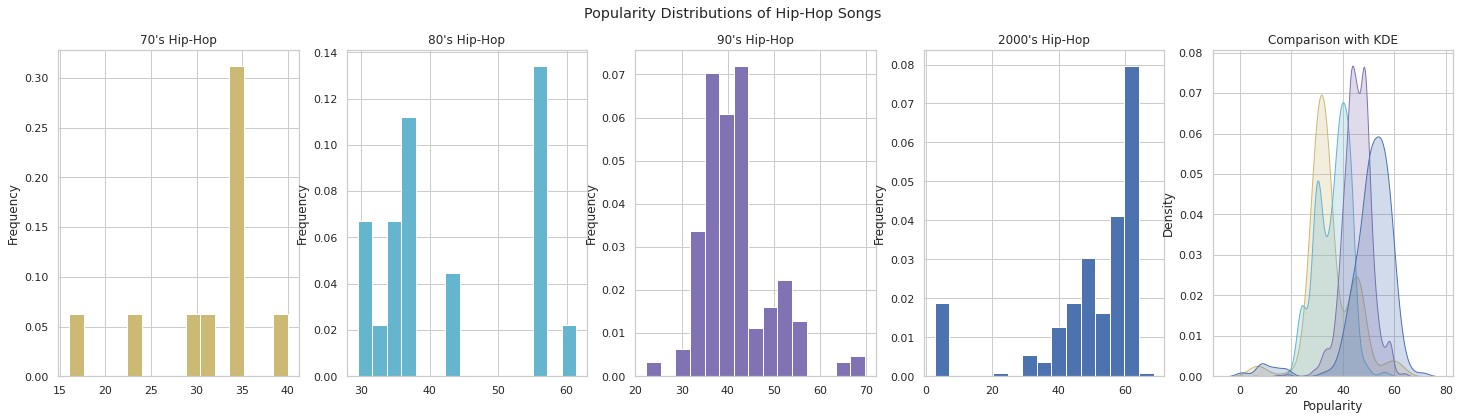

As it can be seen above and especially from KDE plot, 2000's Hip-Hop was closest to normal distribution with slight negative skew. But others nearly shows a denstiy distribution close to bimodal distribution and 2000's rap is highly negatively skewed. However, since the sample size is big enough (N > 20), the distrbutions will be used for further analysis.

Here, one-way between samples ANOVA will be conducted to conclude whether there is a significant difference between different eras of Hip-Hop. To do so, first Levene's test will be conducted for the assumption check.

- Levene Result: Statistic = 52.239425577859755, *p*-value = 2.7421268861639036e-33)


As it can be seen from above, the Levene's test for homogenity of variances is violated, *p* < .001 and with a so small *p*, which was expected when looked at the graph of their distribtions. Thus, the approach should be more suspicious when dicussing the result of ANOVA, for the simplicity, there has been no correction applied for the test.

- F One-way Result: Statistic = 487.2498008435422, *p*-value = 5.698917138239918e-281)

However, since the *p*-value was so small, and therefore suggested a significance difference among different eras for Hip-Hop, it is suspicious to have that much different results than RAP. That's why it has been also applied Central Limit Theorem for the distributions for Hip-Hop popularity for different eras.

- Levene Result: Statistic = 16.760119309695643, *p*-value = 2.86526628208935e-10)

- F One-way Result: Statistic = 36235.211809362656, *p*-value < .01

As can be seen above, even though after CLT applied, the p value for the assumotion check increased, it still violates. And for the ANOVA, the p value was so small that printed as 0.0. Thus, we did nıt use those probabilities.

As a result, even though one should be careful with interpreting the results because of the failure in the assumpiton check, the result seems to be highly significant, *p* < .001. That means, we can reject the null hypothesis and conclude that there is a difference betweeen different eras of on popularity, spesifically for 70's, 80's, 90's, and 2000's for Hip-Hop.

##### **POP**

In here, it has been investigated that whether Pop genre was affected by the era it belongs, i.e. whether there was a significant difference betweeen different years for popularity.

- $\large H_0:$ There is no significant effect of era on popularity on Pop songs.
- $\large H_A:$ Pop songs' popularity is affected by the era.

The 0 popularity songs has been dropped and the data set is divided for 70's, 80's, 90's and 2000's where all category represented an era of Pop Songs.

- Mean score of popularity of Pop Songs of 70's: 37.69.
- Mean score of popularity of Pop Songs of 80's: 40.69.
- Mean score of popularity of Pop Songs of 90's: 45.90.
- Mean score of popularity of Pop Songs of 2000's: 51.20.

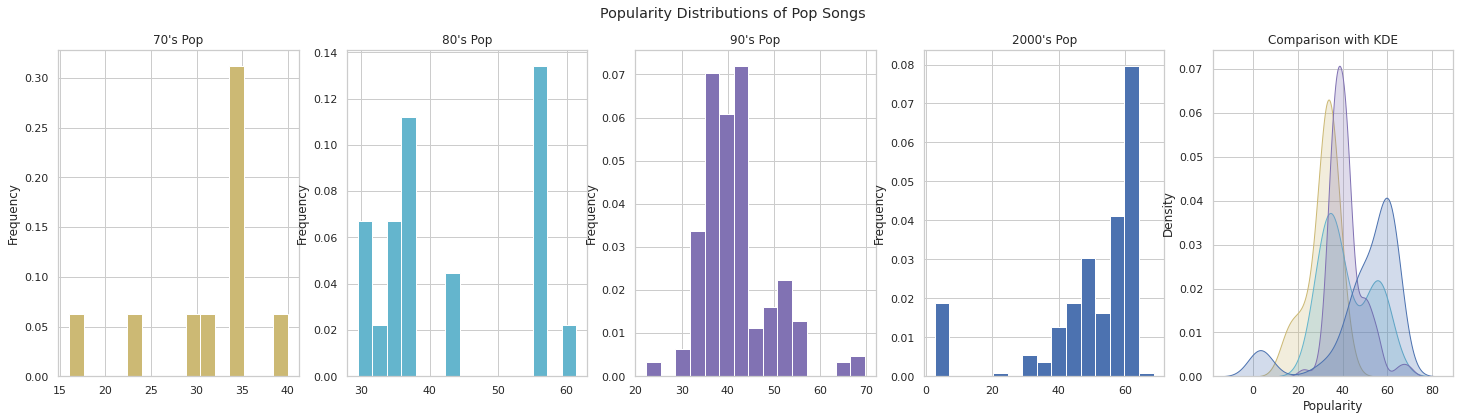

As it can be seen above and especially from KDE plot, 70's Pop was closest to normal distribution then 90's. But 80's nearly shows a denstiy distribution close to bimodal distribution and 2000's rap is highly negatively skewed. These results are similar to the ones of RAP than Hip-Hop. However, again since the sample size is big enough (N > 20), the distrbutions will be used for further analysis.

Here, one-way between samples ANOVA will be conducted to conclude whether there is a significant difference between different eras of Pop. To do so, first Levene's test will be conducted for the assumption check.

- Levene Result: Statistic = 109.40621856057939, *p*-value = 7.112788454017917e-70)

As it can be seen from above, the Levene's test for homogenity of variances is violated, *p* < .001, which was again expected when looked at the graph of their distribtions. Thus, the approach should be more suspicious when dicussing the result of ANOVA, for the simplicity, there has been no correction applied for the test.

- F One-way Result: Statistic = 1117.7300210482626, *p*-value < .001


As it can be seen above, even though one should be careful with interpreting the results because ıf the failure in the assumpiton check, the result seems to be highly significant, with *p* being so small that does not even appear as a percentage. That means, we can reject the null hypothesis and conclude that there is a difference betweeen different eras of on popularity, spesifically for 70's, 80's, 90's, and 2000's for Pop.

After all the hypothesis test conducted on different genres and popularity ditrbituion for eras, they have all showed similar results which is also correlated with what has been found on the previous sections. That in conclusion, year is the leading feature to estimate popularity on songs.

To further analyse the results and possibly find better predictors, one should conduct different tests and analysis with sampling distributions. Additionally, some statistical tests can be also conducted to investigate differences between the binary comparison between eras. Such as doing contrasts if there are priori predictions or conducting post hoc tests with Bonferroni or Tukey's correction for ANOVA or doing t-tests for again dual checks (such as 80's compared to 90's). But for the time being, since it has been aimed to have a more general knowledge and broader perspective over the data set, the previous techniques thought appropriate.

## <font color="#1DB954">**5. Machine Learning**
</font>

Decision Tree, k-NN and Linear Regression machine learning methods are implemented in order to predict song popularities using the scikit-learn library.

As it is stated in the earlier parts, songs with 0 popularity can damage the model because there are many externalities that are not represented in the features. Therefore, they are eliminated. Only acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, and year numeric features are taken into account in all of the models.


### <font color="#9400D3">**5.1. Decision Tree Model**</font>

In the decision tree model, **"min_samples_split"** which shows the minimum number of samples required to split an internal node is used as a hyperparameter. Numbers between 2 and 50 are tested. Results show that min_samples_split = 49 gives the minimum mean squared error (MSE) value on the validation data. On the test data, **MSE is found as 207.25**.

The revised dataframe sizes for the ML processes are as follows: 

- Data shape:  (133484, 11)

- Train shape:  (93438, 10)

- Validation shape:  (20023, 10)

- Test shape:  (20023, 10)

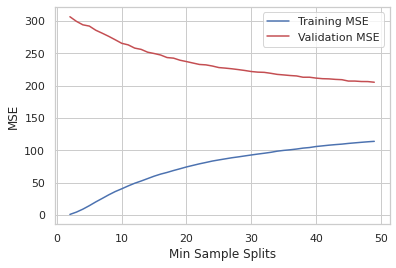

49

Best Validation MSE = 205.1454894492478

Mean Squared Error of Test = 207.51380394438223

### <font color="#9400D3">**5.2. k-NN Model**</font>

Odd k values between 1 and 30 are chosen as hyperparameters in k-NN model and Euclidian distance metric is used. On the validation data, k = 25 gave the minimum MSE. As a result, training is done using this k value and MSE on the test data is found as 201. In order to see the effect of different scales of the features, conversion to scaled versions, substracting mean and dividing by the standard deviation, was neccessary. As expected, MSE value is decreased. This time, k value of 29 gave MSE equal to 180.61.

- Best MSE = 196.43523292213953

- 25

- Mean Squared Error of Test = 201.00674975777855

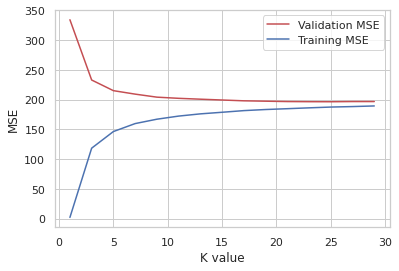

- Best MSE = 180.61028622078663

- 29

- Mean Squared Error of Test = 183.00743128755084

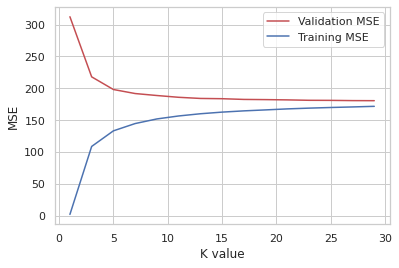

**Linear Regression Model**

Degrees of polynomials between 1 and 5 are chosen as hyperparameters. Although degree 5 polynomial gave the best MSE result on the validation data, it is very close to MSE value with degree 4 polynomial. Since not much improvement is observed, it is rational to pick polynomial degree as 4 which can be calculated much faster compared to degree 5 polynomial. 

- Train Mean squared error of degree 1 polynomial: 233.46490769242502
- Validation Mean squared error of degree 1 polynomial: 229.7212818035638


- Train Mean squared error of degree 2 polynomial: 202.32973349992812
- Validation Mean squared error of degree 2 polynomial: 200.33522939315125


- Train Mean squared error of degree 3 polynomial: 182.56027481908941
- Validation Mean squared error of degree 3 polynomial: 181.63306837533818


- Train Mean squared error of degree 4 polynomial: 176.63470757698815
- Validation Mean squared error of degree 4 polynomial: 179.55476968758893


- Train Mean squared error of degree 5 polynomial: 175.26554556491078
- Validation Mean squared error of degree 5 polynomial: 179.40274525784736

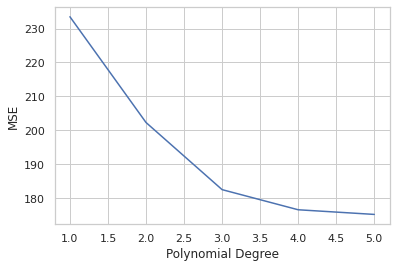

#### **Comparison of Different Machine Learning Models**

These algorithms spend more time on different parts of these machine learning algorithms. In the decision tree, once the tree is formed with a relatively time-consuming greedy algorithm, it is very easy and fast to make a prediction. The worst case will happen at the deepest level of the tree. We follow a path in the tree, and ask new questions depending on the answers given in the previous questions. It is possible to justify the reason behind the prediction this way. Conversely, it takes less time to train the model compared to the testing in the k-NN model. It stores the data points in the training part, and in testing, it calculates new sample’s pairwise distance to every other training data and sorts. Then, it predicts via majority voting among the top k closest neighbors. In terms of memory, k-NN requires more space it has to remember every single point in the data. In the regression model, training time increases with respect to polynomial degree. Moreover, the model becomes prone to overfit as polynomial degree increases. They are both commonly used in the research and industry and it is important to understand their biases before using them.

#### **Results**

Scaled k-NN model and polynomial regression model gave similar results when the best hyperparameters are used. These results are better than k-NN with unscaled features and decision tree.

### <font color="#9400D3">**5.3. Song Recommendation System**</font>

For the song recommendation system, it has been decided to omit the irrelevant columns id, name, artist, explicit, duration and year. In addition, popularity has been removed as the song similarity instinctively should not depend on popularity but acoustic variables instead. Closeness is calculated via Euclidian distances of clusters.

As an example for the recommendation system below, first it draws (without replecament) random songs from the initial data set. In the example the song are the following:

- Keep A Song In Your Soul
- I Put A Spell On You
- Golfing Papa
- True House Music - Xavier Santos & Carlos Gomix Remix
- Xuniverxe
- Crazy Blues - 78rpm Version
- Don't You Advertise Your Man
- Arkansas Blues
- La Chacarera - Remasterizado
- Broken Puppet - Original Mix

And it recommends 2 songs per song and the recommended songs can be seen from below with the format (artist, song):


- Billie Holiday, Teddy Wilson: If Dreams Come True
- Carlos Gardel: De Flor En Flor


- Tommy Dorsey & His Clambake Seven: Vol Vistu Gaily Star
- Sir Lancelot: The Century of the Common Man


- Mamie Smith: The Lure Of The South
- Agustin Magaldi: Portero Suba y Diga


- Shungi Music Crew: The Storm
- Meetya:  Broken Puppet - Original Mix


- 696:  Wanna Make a Wish
- Rome No.9: Hey Lookie
  
- FPS Allstars: Turbo OutRun Theme (From "Turbo Outrun")
- Orchestre Piero Coppola, Ch&#339 Carmen: Acte IV - Voici le quadrille


- Bessie Smith: Empty Bed Blues, Pt. 2
- Bessie Smith: Me and My Gin


- Val Rosing: Try A Little Tenderness
- Hoagy Carmichael & His Orchestra, Bix Beiderbecke: Georgia On My Mind (feat. Bix Beiderbecke)


- Francisco Canaro  El Huerfano: Remasterizado
- Ignacio Corsini: La Payasa - Remasterizado


- Oscar Velazquez: True House Music - Original Massive Mix
- Oscar Velazquez: True House Music - Xavier Santos & Carlos Gomi..

When the song features and recommended songs are checked manually to observe how relevent they are it has been observed that the recommended songs match the initially designated ones based on both genre and acoustics, showing that the system works as intended.